In [1]:
import torch

In [2]:
# !nvidia-smi

In [3]:
# Determine the device for computation:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
!pip install tensorflow-text==2.10.0

In [5]:
!pip install matplotlib
!pip install pandas
!pip install nltk
!pip install sklearn
!pip install tensorflow
!pip install tensorflow_hub
!pip install wordcloud

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
# import libraries
import pandas as pd
from nltk.tokenize import word_tokenize
import string
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import io

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# # Load the Spam dataset
from google.colab import files


uploaded = files.upload()

Saving spam.csv to spam.csv


In [9]:
# Read the spam data into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']))

In [10]:
#Display the rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
# Drop columns with missing values (NaN) from the DataFrame
df.dropna(axis=1, inplace=True)

In [12]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
# Rename columns 'v1' and 'v2' to 'target' and 'text' respectively
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [14]:
# Display descriptive statistics
df.describe()

,target,text
count,5572,5572
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [15]:
# Count the number of duplicated rows in the DataFrame
df.duplicated().sum()

414

In [16]:
# Drop duplicated rows from the DataFrame
df.drop_duplicates(inplace=True)

In [17]:
# Display descriptive statistics after removing duplicates
df.describe()

,target,text
count,5158,5158
unique,2,5158
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [18]:
df.shape

(5158, 2)

<Axes: xlabel='target'>

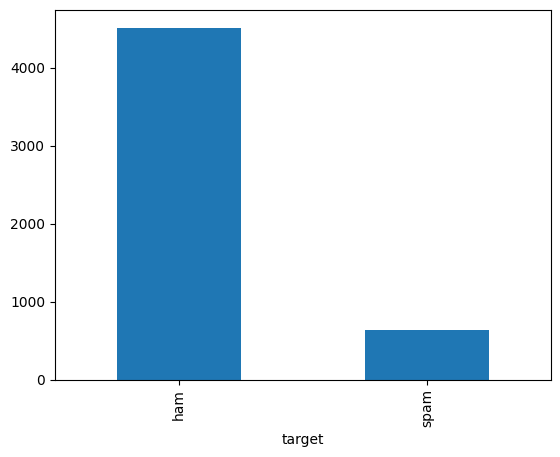

In [19]:
# Plot a bar chat for the target class
df['target'].value_counts().plot(kind='bar')

In [20]:
# Define a function to preprocess text data
def preprocess_text(text):
    text = text.strip().lower()
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text_tokens = word_tokenize(text)
    text_tokens = [text_token for text_token in text_tokens if text_token.isalpha()]
    text_tokens = [text_token.translate(str.maketrans('', '', string.punctuation)) for text_token in text_tokens]
    stemmer = PorterStemmer()
    text_tokens = [stemmer.stem(text_token) for text_token in text_tokens if not text_token in set(stopwords.words('english'))]
    text = ' '.join(text_tokens)
    return text

In [21]:
# Apply the preprocess_text function to the 'text' column
df['clean_text'] = df['text'].apply(preprocess_text)

In [22]:
df.head()

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


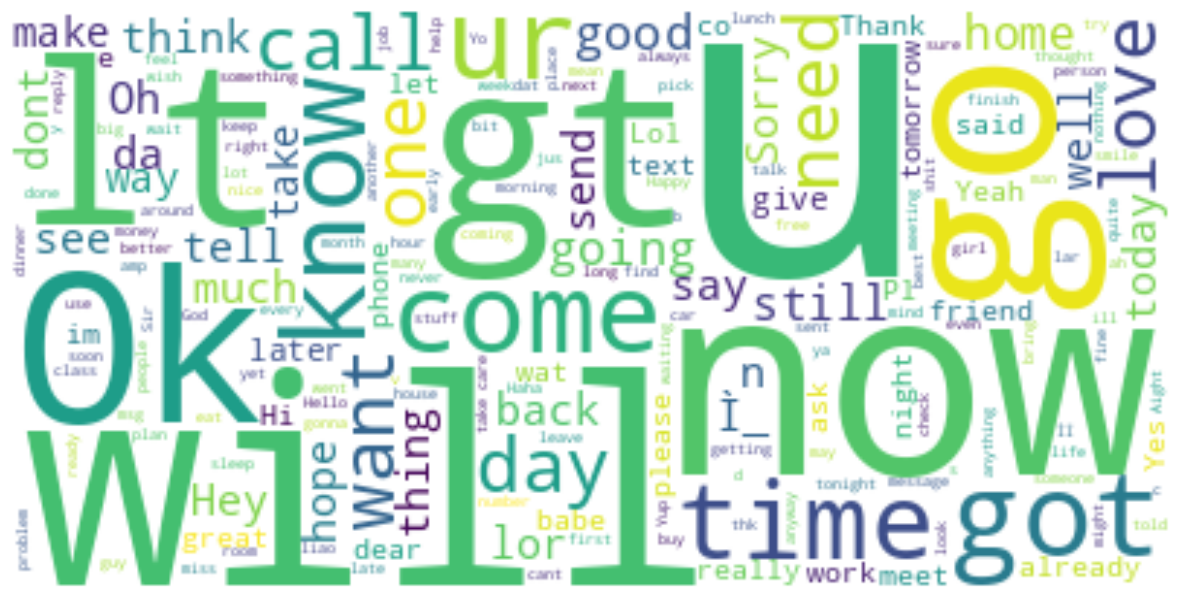

In [23]:
# Wordcloud of most used words in non-spam texts
text = " ".join(text for text in df.text[df.target=='ham'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

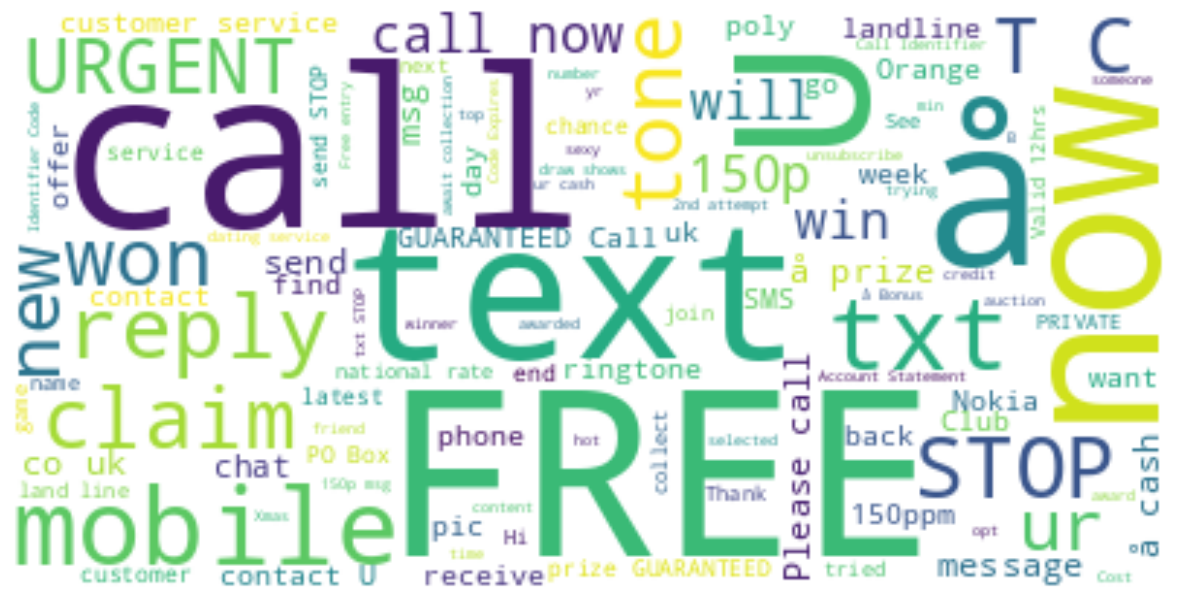

In [24]:
# Wordcloud of most used words in spam texts
text = " ".join(text for text in df.text[df.target=='spam'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
# Initialize CountVectorizer to convert text data into a matrix of token counts
cv = CountVectorizer()
# Fit and transform the 'clean_text' column into a matrix of token counts
X = cv.fit_transform(df['clean_text']).toarray()

In [26]:
# Initialize LabelEncoder
label_encoder = LabelEncoder().fit(df['target'])
y = label_encoder.transform(df['target'])
# Display the classes
label_encoder.classes_

array(['ham', 'spam'], dtype=object)

In [27]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.3, stratify=y)

In [28]:
# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Generate a classification report for the Multinomial Naive Bayes classifier
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.980176,0.985136,0.982650,3162.000000
1,0.891455,0.859688,0.875283,449.000000
accuracy,0.969538,0.969538,0.969538,0.969538
macro avg,0.935816,0.922412,0.928967,3611.000000
weighted avg,0.969144,0.969538,0.969300,3611.000000


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [29]:
# Train a Logistic Regression classifier
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Generate a classification report for the Logistic Regression classifier
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.968914,0.995572,0.982062,3162.000000
1,0.961326,0.775056,0.858200,449.000000
accuracy,0.968153,0.968153,0.968153,0.968153
macro avg,0.965120,0.885314,0.920131,3611.000000
weighted avg,0.967970,0.968153,0.966661,3611.000000


In [30]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text

In [31]:
# Define a Sequential neural network model using TensorFlow Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])
# Compile the model with binary crossentropy loss and SGD optimizer
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [32]:
# Build the model
model.build(X_train.shape)

In [33]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1547, 32)                187136    
                                                                 
 dense_1 (Dense)             (1547, 64)                2112      
                                                                 
 dense_2 (Dense)             (1547, 1)                 65        
                                                                 
Total params: 189,313
Trainable params: 189,313
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Train the model on the training data
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.3)

Epoch 1/200
34/34 [==============================] - 1s 12ms/step - loss: 0.6582 - accuracy: 0.8420 - val_loss: 0.6213 - val_accuracy: 0.8774
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 0.5919 - accuracy: 0.8743 - val_loss: 0.5606 - val_accuracy: 0.8774
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 0.5368 - accuracy: 0.8743 - val_loss: 0.5113 - val_accuracy: 0.8774
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4934 - accuracy: 0.8743 - val_loss: 0.4735 - val_accuracy: 0.8774
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4605 - accuracy: 0.8743 - val_loss: 0.4455 - val_accuracy: 0.8774
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 0.4361 - accuracy: 0.8743 - val_loss: 0.4243 - val_accuracy: 0.8774
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 0.4177 - accuracy: 0.8743 - val_loss: 0.4086 - val_accuracy: 0.8774
Epoch 8/200


In [35]:
# Predict labels for the test set
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

113/113 [==============================] - 0s 2ms/step


In [36]:
# Generate a classification report for the neural network model
pd.DataFrame(classification_report(y_test, y_hat, output_dict=True)).T

,precision,recall,f1-score,support
0,0.970325,0.992726,0.981398,3162.000000
1,0.938830,0.786192,0.855758,449.000000
accuracy,0.967045,0.967045,0.967045,0.967045
macro avg,0.954577,0.889459,0.918578,3611.000000
weighted avg,0.966408,0.967045,0.965775,3611.000000


In [37]:
model.evaluate(X_test, y_test)

113/113 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9670


[0.11019681394100189, 0.9670451283454895]

In [38]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['target'], stratify=df['target'])

In [39]:
# Load the BERT preprocessing and encoder layers from TensorFlow Hub
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [40]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [41]:
#Display the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

In [42]:
# Define evaluation metrics for the model
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [43]:
# Replace 'spam' and 'ham' labels with binary values (1 for 'spam', 0 for 'ham')
y_train.replace({'spam':1, 'ham':0}, inplace = True)

y_test.replace({'spam':1, 'ham':0}, inplace = True)

In [44]:
# Train the BERT-based model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
121/121 [==============================] - 1670s 14s/step - loss: 0.4041 - accuracy: 0.8444 - precision: 0.1694 - recall: 0.0644
Epoch 2/10
121/121 [==============================] - 1620s 13s/step - loss: 0.3207 - accuracy: 0.8769 - precision: 0.6923 - recall: 0.0187
Epoch 3/10
121/121 [==============================] - 1640s 14s/step - loss: 0.2927 - accuracy: 0.8834 - precision: 0.8409 - recall: 0.0769
Epoch 4/10
121/121 [==============================] - 1641s 14s/step - loss: 0.2766 - accuracy: 0.8914 - precision: 0.8765 - recall: 0.1476
Epoch 5/10
121/121 [==============================] - 1638s 14s/step - loss: 0.2612 - accuracy: 0.8945 - precision: 0.8120 - recall: 0.1975
Epoch 6/10
121/121 [==============================] - 1618s 13s/step - loss: 0.2482 - accuracy: 0.9046 - precision: 0.8836 - recall: 0.2682
Epoch 7/10
121/121 [==============================] - 1603s 13s/step - loss: 0.2417 - accuracy: 0.9062 - precision: 0.8391 - recall: 0.3035
Epoch 8/10
121/121 [

In [51]:
history = model.fit

In [52]:
# Predict labels for the test set
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

41/41 [==============================] - 566s 14s/step


In [54]:
# Generate a classification report for the BERT-based model
pd.DataFrame(classification_report(y_test, y_hat, output_dict=True)).T

,precision,recall,f1-score,support
0,0.927920,0.992028,0.958904,1129.000000
1,0.891566,0.459627,0.606557,161.000000
accuracy,0.925581,0.925581,0.925581,0.925581
macro avg,0.909743,0.725828,0.782731,1290.000000
weighted avg,0.923383,0.925581,0.914929,1290.000000


In [47]:
# Evaluate the BERT-based model
model.evaluate(X_test, y_test)

41/41 [==============================] - 533s 13s/step - loss: 0.1974 - accuracy: 0.9256 - precision: 0.8916 - recall: 0.4596


[0.1973622590303421,
 0.9255813956260681,
 0.891566276550293,
 0.45962733030319214]